<a href="https://colab.research.google.com/github/SebiBarson/DIP_Project/blob/sebastian/dip_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Edge detection using morphological operations**

Step 1: importing libraries

In [105]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Step 2: importing image

In [107]:
def toBackground(pixel):
  if(isObjectPixel(pixel)):
    return 225 - pixel
  return pixel

In [108]:
def toObject(pixel):
  if(isObjectPixel(pixel) != True):
    return 225 - pixel
  return pixel

In [109]:
def isObjectPixel(pixel):
  if(pixel < 113):
    return True
  return False

In [125]:
def expandImg(image):
  result = np.zeros([len(image), len(image[0])]).astype(int)
  h = len(image)
  w = len(image[0])

  for i in range(1, h):
    for j in range(1, w):
      if(isObjectPixel(image[i][j])):
        result[i][j] = image[i][j]

  #body:
  for i in range(1, h-1):
    for j in range(1, w-1):
      if(isObjectPixel(image[i-1][j]) or isObjectPixel(image[i+1][j]) or isObjectPixel(image[i][j-1]) or isObjectPixel(image[i][j+1])):
        result[i][j] = toObject(image[i][j])

  #sides:
  for j in range(1, w-1):
      if(isObjectPixel(image[1][j]) or isObjectPixel(image[0][j-1]) or isObjectPixel(image[0][j+1])):
        result[0][j] = toObject(image[0][j])
      if(isObjectPixel(image[h-2][j]) or isObjectPixel(image[h-1][j-1]) or isObjectPixel(image[h-1][j+1])):
        result[h-1][j] = toObject(image[h-1][j])

  for i in range(1, h-1):
      if(isObjectPixel(image[i-1][0]) or isObjectPixel(image[i+1][0]) or isObjectPixel(image[i][1])):
        result[i][0] = toObject(image[i][0])
      if(isObjectPixel(image[i-1][w-1]) or isObjectPixel(image[i+1][w-1]) or isObjectPixel(image[i][w-2])):
        result[i][w-1] = toObject(image[i][w-1])

  #corners:
  if(isObjectPixel(image[1][0]) or isObjectPixel(image[0][1])):
    result[0][0] = toObject(image[0][0])
  if(isObjectPixel(image[0][w-2]) or isObjectPixel(image[1][w-1])):
    result[0][w-1] = toObject(image[0][w-1])
  if(isObjectPixel(image[h-1][1]) or isObjectPixel(image[h-2][0])):
    result[h-1][0] = toObject(image[h-1][0])
  if(isObjectPixel(image[h-2][w-1]) or isObjectPixel(image[h-1][w-2])):
    result[h-1][w-1] = toObject(image[h-1][w-1])

  return result

In [111]:
def erodeImg(image):
  result = np.zeros([len(image), len(image[0])]).astype(int)
  h = len(image)
  w = len(image[0])
  
  #body:
  for i in range(1, h-1):
    for j in range(1, w-1):
      if(isObjectPixel(image[i-1][j]) and isObjectPixel(image[i+1][j]) and isObjectPixel(image[i][j-1]) and isObjectPixel(image[i][j+1])):
        result[i][j] = toObject(image[i][j])

  #sides:
  for j in range(1, w-1):
      if(isObjectPixel(image[1][j]) and isObjectPixel(image[0][j-1]) and isObjectPixel(image[0][j+1])):
        result[0][j] = toObject(image[0][j])
      if(isObjectPixel(image[h-2][j]) and isObjectPixel(image[h-1][j-1]) and isObjectPixel(image[h-1][j+1])):
        result[h-1][j] = toObject(image[h-1][j])

  for i in range(1, h-1):
      if(isObjectPixel(image[i-1][0]) and isObjectPixel(image[i+1][0]) and isObjectPixel(image[i][1])):
        result[i][0] = toObject(image[i][0])
      if(isObjectPixel(image[i-1][w-1]) and isObjectPixel(image[i+1][w-1]) and isObjectPixel(image[i][w-2])):
        result[i][w-1] = toObject(image[i][w-1])

  #corners:
  if(isObjectPixel(image[1][0]) and isObjectPixel(image[0][1])):
    result[0][0] = toObject(image[0][0])
  if(isObjectPixel(image[0][w-2]) and isObjectPixel(image[1][w-1])):
    result[0][w-1] = toObject(image[0][w-1])
  if(isObjectPixel(image[h-1][1]) and isObjectPixel(image[h-2][0])):
    result[h-1][0] = toObject(image[h-1][0])
  if(isObjectPixel(image[h-2][w-1]) and isObjectPixel(image[h-1][w-2])):
    result[h-1][w-1] = toObject(image[h-1][w-1])

  return result

In [112]:
def openImg(image):
  return expandImg(erodeImg(image))

In [113]:
def closeImg(image):
  return erodeImg(expandImg(image))

In [116]:
InputIm_FileName="img.png"
InImg=cv2.imread(InputIm_FileName,0)

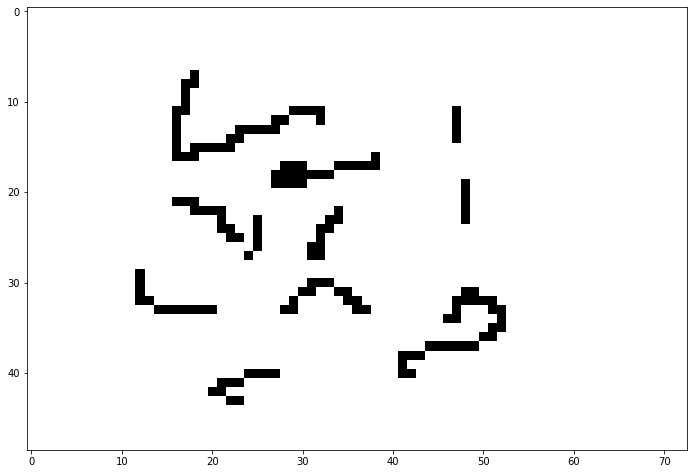

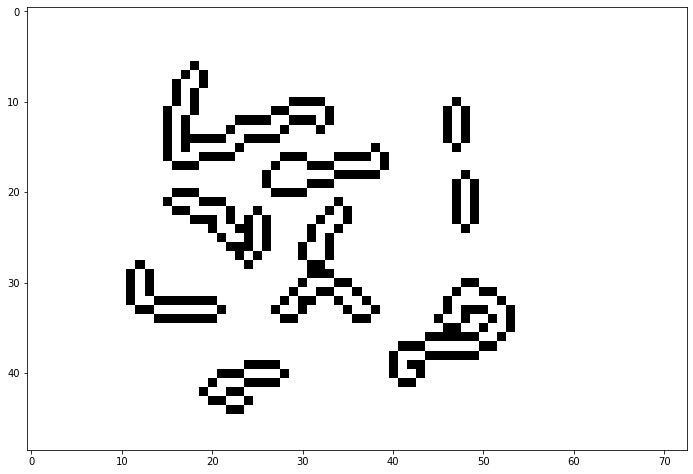

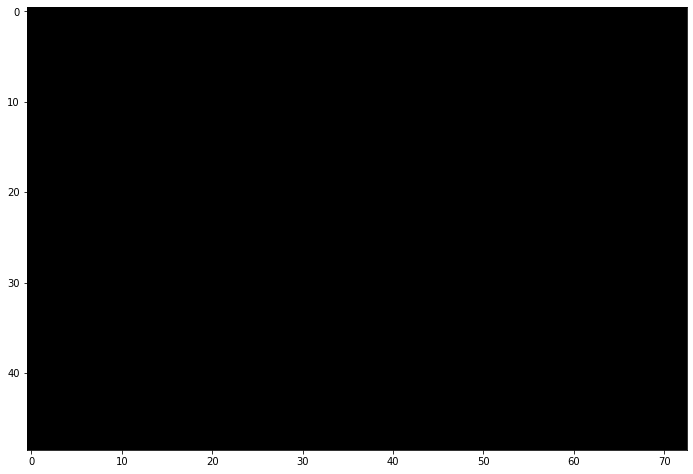

In [126]:
H,W=InImg.shape
DPI=40
plt.figure(figsize=(W/DPI+10,H/DPI+10))
plt.imshow(InImg,cmap = 'gray')
plt.show()

plt.figure(figsize=(W/DPI+10,H/DPI+10))
plt.imshow(expandImg(InImg),cmap = 'gray')
plt.show()

plt.figure(figsize=(W/DPI+10,H/DPI+10))
plt.imshow(erodeImg(InImg),cmap = 'gray')
plt.show()